In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

!pip install plotly
import plotly.express as px

df = pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [2]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
#Imovel mais antigo
df['date'] = pd.to_datetime(df['date'])
df['date'].sort_values(ascending = True)

16768   2014-05-02
9596    2014-05-02
9587    2014-05-02
20602   2014-05-02
11577   2014-05-02
           ...    
7898    2015-05-14
928     2015-05-14
5637    2015-05-15
13053   2015-05-24
16594   2015-05-27
Name: date, Length: 21613, dtype: datetime64[ns]

In [5]:
#Quantos imoveis possuem numero maximo de andares
df['floors'].max()  #Máximo de andares
df[df['floors'] == df['floors'].max()].shape[0]

8

In [6]:
#Nova coluna classificando o nível das casas de acordo com o seu preço
df.loc[ df['price'] >= 540000 , 'standard'] = 'high_standard'
df.loc[ df['price'] <= 540000 , 'standard'] = 'low_standard'
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...        1180              0   
1      7242     2.0           0     0  ...        2170            400   
2     10000     1.0           0     0  ...         770              0   
3      5000     1.0           0     0  ...        1050            910   
4      8080     1.0           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15       standard  
0        5650   low_standard  
1        7639   low_standard  
2        8062   low_standard  
3        5000  high_standard  
4        7503   low_standard  

[5 rows x 22 columns]

In [7]:
lista = ['id', 'date', 'bedrooms', 'sqft_lot', 'price', 'standard']
df[lista].sort_values('price', ascending = False)

id       date  bedrooms  sqft_lot      price       standard
7252   6762700020 2014-10-13         6     27600  7700000.0  high_standard
3914   9808700762 2014-06-11         5     37325  7062500.0  high_standard
9254   9208900037 2014-09-19         6     31374  6885000.0  high_standard
4411   2470100110 2014-08-04         5     35069  5570000.0  high_standard
1448   8907500070 2015-04-13         5     23985  5350000.0  high_standard
...           ...        ...       ...       ...        ...            ...
8274   3883800011 2014-11-05         3     10426    82000.0   low_standard
16198  3028200080 2015-03-24         2      9975    81000.0   low_standard
465    8658300340 2014-05-23         1      5050    80000.0   low_standard
15293    40000362 2014-05-06         2     16344    78000.0   low_standard
1149   3421079032 2015-02-17         1     43377    75000.0   low_standard

[21613 rows x 6 columns]

In [8]:
#Mapa indicando onde as casas estão localizadas
mapa = df[['id','lat', 'long', 'price' ]]
fig = px.scatter_mapbox(mapa,
                        lat='lat',
                        lon='long',
                        hover_name='id',
                        hover_data=['price'],
                        color_discrete_sequence = ['fuchsia'],
                        zoom=3,
                        height = 300)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=600, margin= {'l':0, 'r':0, 'b':0, 't':0})
fig.show()



In [9]:
df['date'] = pd.to_datetime(df['date'])
df.loc[df['date'] > '2014-01-01' ,'house_age'] = 'new_house'
df.loc[df['date'] < '2014-01-01' ,'house_age'] = 'old_house'
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650     1.0           0     0  ...              0      1955   
1      7242     2.0           0     0  ...            400      1951   
2     10000     1.0           0     0  ...              0      1933   
3      5000     1.0           0     0  ...            910      1965   
4      8080     1.0           0     0  ...              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0             0    98178  47.5112 -122.257           1340        5650   
1          1991    98125  47.7210 -122.319           1690        7639   
2             0    98028  47.7379 -122.233           2720        8062   
3             0    98136  47.5208 -122.393           1360        5000   
4             0    98074  47.6168 -122.045           1800        7503   

        standard  house_age  
0   low_standard  new_house  
1   low_standard  new_house  
2   low_standard  new_house  
3  high_standard  new_house  
4   low_standard  new_house  

[5 rows x 23 columns]

In [10]:
df[df['date']<='2014-01-01']

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, standard, house_age]
Index: []

[0 rows x 23 columns]

In [11]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [116]:
df.loc[ df['bedrooms'] == 1, 'dormitory_type'] = 'studio'
df.loc[ df['bedrooms'] == 2, 'dormitory_type'] = 'apartment'
df.loc[ df['bedrooms'] > 2, 'dormitory_type'] = 'house'
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
0      5650     1.0           0     0  ...    98178  47.5112 -122.257   
1      7242     2.0           0     0  ...    98125  47.7210 -122.319   
2     10000     1.0           0     0  ...    98028  47.7379 -122.233   
3      5000     1.0           0     0  ...    98136  47.5208 -122.393   
4      8080     1.0           0     0  ...    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15       standard  house_age  dormitory_tye  \
0           1340        5650   low_standard  new_house          house   
1           1690        7639   low_standard  new_house          house   
2           2720        8062   low_standard  new_house      apartment   
3           1360        5000  high_standard  new_house          house   
4           1800        7503   low_standard  new_house          house   

   condition_type  dormitory_type  
0         regular           house  
1         regular           house  
2         regular       apartment  
3         regular           house  
4         regular           house  

[5 rows x 26 columns]

In [117]:
df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [118]:
#Criar coluna das condições dos imoveis
df.loc[ df['condition'] <= 2 , 'condition_type'] = 'bad'
df.loc[ (df['condition'] == 3) | (df['condition'] == 4), 'condition_type'] = 'regular'
df.loc[ df['condition'] == 5 , 'condition_type'] = 'good'
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
0      5650     1.0           0     0  ...    98178  47.5112 -122.257   
1      7242     2.0           0     0  ...    98125  47.7210 -122.319   
2     10000     1.0           0     0  ...    98028  47.7379 -122.233   
3      5000     1.0           0     0  ...    98136  47.5208 -122.393   
4      8080     1.0           0     0  ...    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15       standard  house_age  dormitory_tye  \
0           1340        5650   low_standard  new_house          house   
1           1690        7639   low_standard  new_house          house   
2           2720        8062   low_standard  new_house      apartment   
3           1360        5000  high_standard  new_house          house   
4           1800        7503   low_standard  new_house          house   

   condition_type  dormitory_type  
0         regular           house  
1         regular           house  
2         regular       apartment  
3            good           house  
4         regular           house  

[5 rows x 26 columns]

In [119]:
#Data mais antiga da construção de um imóvel
aux1 = df['yr_built'].unique().tolist()
aux1.sort()
aux1[1]

1901

In [120]:
#Data mais antiga da renovação de um imóvel
aux2 = df['yr_renovated'].unique().tolist()
aux2.sort()
aux2[1]

1934

In [121]:
#Quantos imoveis tem dois andares
df[df['floors'] == 2].shape[0]

8241

In [122]:
#Imoveis com a condição regular
df[df['condition_type'] == 'regular'].shape[0]

19710

In [123]:
#Imoveis com a condição bad e com vista para o mar
df[(df['condition_type'] == 'bad') & (df['waterfront'] == 1)]

id       date      price  bedrooms  bathrooms  sqft_living  \
11225  6613000935 2014-05-13  2555000.0         4        2.5         5300   
15371  7936500221 2015-01-14   658000.0         2        1.0         1010   

       sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
11225     26211     2.0           1     2  ...    98105  47.6610 -122.269   
15371     14244     1.0           1     4  ...    98136  47.5476 -122.399   

       sqft_living15  sqft_lot15       standard  house_age  dormitory_tye  \
11225           3890       19281  high_standard  new_house          house   
15371           1820       15792  high_standard  new_house      apartment   

       condition_type  dormitory_type  
11225             bad           house  
15371             bad       apartment  

[2 rows x 26 columns]

In [124]:
#Imoveis com a condição good e sao new houses
df[(df['condition_type'] == 'good') & (df['house_age'] == 'new_house')]

id       date      price  bedrooms  bathrooms  sqft_living  \
3      2487200875 2014-12-09   604000.0         4       3.00         1960   
25     1202000200 2014-11-03   233000.0         3       2.00         1710   
27     3303700376 2014-12-01   667000.0         3       1.00         1400   
49      822039084 2015-03-11  1350000.0         3       2.50         2753   
62     5072410070 2014-10-21   505000.0         3       1.75         2519   
...           ...        ...        ...       ...        ...          ...   
19604  7518504130 2014-06-26   663000.0         3       2.00         1480   
19620  3902100175 2014-07-28   850000.0         5       3.00         3900   
19873  3449000060 2014-10-01   320000.0         3       1.00         1400   
19905  2888000030 2014-09-26   500000.0         4       2.25         2270   
21303   522059130 2015-04-29   465000.0         3       1.00         1150   

       sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
3          5000     1.0           0     0  ...    98136  47.5208 -122.393   
25         4697     1.5           0     0  ...    98002  47.3048 -122.218   
27         1581     1.5           0     0  ...    98112  47.6221 -122.314   
49        65005     1.0           1     2  ...    98070  47.4041 -122.451   
62         8690     2.0           0     0  ...    98166  47.4428 -122.344   
...         ...     ...         ...   ...  ...      ...      ...      ...   
19604      3876     1.0           0     0  ...    98117  47.6808 -122.382   
19620      5250     1.5           0     1  ...    98116  47.5577 -122.389   
19873      9000     1.0           0     0  ...    98059  47.5022 -122.145   
19905      8196     1.0           0     0  ...    98034  47.7214 -122.227   
21303     18200     1.0           0     0  ...    98058  47.4262 -122.187   

       sqft_living15  sqft_lot15       standard  house_age  dormitory_tye  \
3               1360        5000  high_standard  new_house          house   
25              1030        4705   low_standard  new_house          house   
27              1860        3861  high_standard  new_house          house   
49              2680       72513  high_standard  new_house          house   
62              2500        9500   low_standard  new_house          house   
...              ...         ...            ...        ...            ...   
19604           1660        3774  high_standard  new_house          house   
19620           1950        5700  high_standard  new_house          house   
19873           1440        8400   low_standard  new_house          house   
19905           1920       10122   low_standard  new_house          house   
21303           1714       18200   low_standard  new_house          house   

       condition_type  dormitory_type  
3                good           house  
25               good           house  
27               good           house  
49               good           house  
62               good           house  
...               ...             ...  
19604            good           house  
19620            good           house  
19873            good           house  
19905            good           house  
21303            good           house  

[1701 rows x 26 columns]

In [136]:
#Apagar coluna
df = df.drop(['dormitory_tye'], axis = 1)

KeyError: "['dormitory_tye'] not found in axis"

In [155]:
#Imovel mais caro do tipo studio
df[df['dormitory_type'] == 'studio'].sort_values('price', ascending = False).head(1)

id       date      price  bedrooms  bathrooms  sqft_living  \
8445  724069023 2015-04-14  1247000.0         1       1.25         1810   

      sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode      lat  \
8445      5070     1.5           1     4  ...             0    98075  47.5814   

         long  sqft_living15  sqft_lot15       standard  house_age  \
8445 -122.081           2280        5070  high_standard  new_house   

      condition_type  dormitory_type  
8445         regular          studio  

[1 rows x 25 columns]

In [157]:
#Imoveis do tipo apartamento reformados em 2015
df[(df['dormitory_type'] == 'apartament') & (df['yr_renovated'] == 2015)]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, standard, house_age, condition_type, dormitory_type]
Index: []

[0 rows x 25 columns]

In [169]:
#Maios numero de quartos de um imovel do tipo house
df[df['dormitory_type'] == 'house'].sort_values('bedrooms',ascending = False ).head(1)

id       date     price  bedrooms  bathrooms  sqft_living  \
15870  2402100895 2014-06-25  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode  \
15870      6000     1.0           0     0  ...             0    98103   

           lat     long  sqft_living15  sqft_lot15       standard  house_age  \
15870  47.6878 -122.331           1330        4700  high_standard  new_house   

       condition_type  dormitory_type  
15870            good           house  

[1 rows x 25 columns]

In [178]:
#Quantos imoveis new house foram reformados em 2014
aux3 = df[['yr_built', 'house_age']].groupby('yr_built').count().reset_index()
aux3[aux3['yr_built'] == 2014]

yr_built  house_age
114      2014        559

In [179]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'standard', 'house_age',
       'condition_type', 'dormitory_type'],
      dtype='object')

In [180]:
#Selecionar colunas direto pelo nome
df[['id', 'date', 'price', 'floors']]

id       date     price  floors
0      7129300520 2014-10-13  221900.0     1.0
1      6414100192 2014-12-09  538000.0     2.0
2      5631500400 2015-02-25  180000.0     1.0
3      2487200875 2014-12-09  604000.0     1.0
4      1954400510 2015-02-18  510000.0     1.0
...           ...        ...       ...     ...
21608   263000018 2014-05-21  360000.0     3.0
21609  6600060120 2015-02-23  400000.0     2.0
21610  1523300141 2014-06-23  402101.0     2.0
21611   291310100 2015-01-16  400000.0     2.0
21612  1523300157 2014-10-15  325000.0     2.0

[21613 rows x 4 columns]

In [189]:
#selecionar colunas pelo índice
df.iloc[:,[0,1,2,7]]

id       date     price  floors
0      7129300520 2014-10-13  221900.0     1.0
1      6414100192 2014-12-09  538000.0     2.0
2      5631500400 2015-02-25  180000.0     1.0
3      2487200875 2014-12-09  604000.0     1.0
4      1954400510 2015-02-18  510000.0     1.0
...           ...        ...       ...     ...
21608   263000018 2014-05-21  360000.0     3.0
21609  6600060120 2015-02-23  400000.0     2.0
21610  1523300141 2014-06-23  402101.0     2.0
21611   291310100 2015-01-16  400000.0     2.0
21612  1523300157 2014-10-15  325000.0     2.0

[21613 rows x 4 columns]

In [198]:
#Selecionar colunas pelo indices das linha e o nome das colunas
df.loc[0,['id', 'date', 'price', 'floors']]

id                 7129300520
date      2014-10-13 00:00:00
price                221900.0
floors                    1.0
Name: 0, dtype: object

In [195]:
#Selecionar colunas pelos índices booleanos
df.loc[:, [True, True, True, False, False, False, False, True,False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ]]

id       date     price  floors
0      7129300520 2014-10-13  221900.0     1.0
1      6414100192 2014-12-09  538000.0     2.0
2      5631500400 2015-02-25  180000.0     1.0
3      2487200875 2014-12-09  604000.0     1.0
4      1954400510 2015-02-18  510000.0     1.0
...           ...        ...       ...     ...
21608   263000018 2014-05-21  360000.0     3.0
21609  6600060120 2015-02-23  400000.0     2.0
21610  1523300141 2014-06-23  402101.0     2.0
21611   291310100 2015-01-16  400000.0     2.0
21612  1523300157 2014-10-15  325000.0     2.0

[21613 rows x 4 columns]

In [213]:
#Numero de imoveis por ano de contrução
df.groupby('yr_built')['id'].count().reset_index()

yr_built   id
0        1900   87
1        1901   29
2        1902   27
3        1903   46
4        1904   45
..        ...  ...
111      2011  130
112      2012  170
113      2013  201
114      2014  559
115      2015   38

[116 rows x 2 columns]

In [221]:
#Menor número de quartos por ano de construção
df[['yr_built','bedrooms']].groupby('yr_built').count().reset_index()

yr_built  bedrooms
0        1900        87
1        1901        29
2        1902        27
3        1903        46
4        1904        45
..        ...       ...
111      2011       130
112      2012       170
113      2013       201
114      2014       559
115      2015        38

[116 rows x 2 columns]

In [229]:
#Preço de compra mais alto por cada número de quarto
df[['price','bedrooms']].groupby('bedrooms').max().reset_index()

bedrooms      price
0          0  1295650.0
1          1  1247000.0
2          2  3278000.0
3          3  3800000.0
4          4  4489000.0
5          5  7062500.0
6          6  7700000.0
7          7  3200000.0
8          8  3300000.0
9          9  1400000.0
10        10  1148000.0
11        11   520000.0
12        33   640000.0

In [228]:
#Soma de todos os preços de compra por número de quarto
df[['price','bedrooms']].groupby('bedrooms').sum().reset_index()

bedrooms         price
0          0  5.323550e+06
1          1  6.321093e+07
2          2  1.107789e+09
3          3  4.580264e+09
4          4  4.372957e+09
5          5  1.259346e+09
6          6  2.245416e+08
7          7  3.614502e+07
8          8  1.436600e+07
9          9  5.363999e+06
10        10  2.458000e+06
11        11  5.200000e+05
12        33  6.400000e+05

In [230]:
#Soma de todos os preços de compra por número de quarto e banheiro
df[['price','bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms']).sum().reset_index()

bedrooms  bathrooms      price
0           0       0.00  3642600.0
1           0       0.75   265000.0
2           0       1.00   228000.0
3           0       1.50   288000.0
4           0       2.50   899950.0
..        ...        ...        ...
139        10       2.00   650000.0
140        10       3.00   660000.0
141        10       5.25  1148000.0
142        11       3.00   520000.0
143        33       1.75   640000.0

[144 rows x 3 columns]

In [232]:
#Tamanho medio das salas por ano de construção
df[['sqft_living', 'yr_built']].groupby('yr_built').mean().reset_index()

yr_built  sqft_living
0        1900  1732.011494
1        1901  1763.620690
2        1902  1919.629630
3        1903  1507.739130
4        1904  1603.177778
..        ...          ...
111      2011  2313.684615
112      2012  2378.741176
113      2013  2636.592040
114      2014  2615.389982
115      2015  2596.315789

[116 rows x 2 columns]

In [233]:
#Tamanho da mediana das salas por ano de construção
df[['sqft_living', 'yr_built']].groupby('yr_built').median().reset_index()

yr_built  sqft_living
0        1900       1540.0
1        1901       1610.0
2        1902       1600.0
3        1903       1505.0
4        1904       1280.0
..        ...          ...
111      2011       2270.0
112      2012       2237.5
113      2013       2580.0
114      2014       2650.0
115      2015       2590.0

[116 rows x 2 columns]

In [236]:
#Qual o desvio padrao do tamanhpo das salas por ano de construção
df[['sqft_living', 'yr_built']].groupby('yr_built').std().reset_index()

yr_built  sqft_living
0        1900   732.944373
1        1901   668.231804
2        1902   878.659300
3        1903   469.723438
4        1904  1076.870620
..        ...          ...
111      2011   804.863521
112      2012   771.430350
113      2013   883.499390
114      2014   893.810049
115      2015  1155.605425

[116 rows x 2 columns]

In [278]:
#Como é o crescimento médio de preços de compras dos imoveis, por ano, por dia e pela semana do ano?
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date']
df['week'] = df['date'].dt.strftime('%Y-%U')

<BarContainer object of 2 artists>

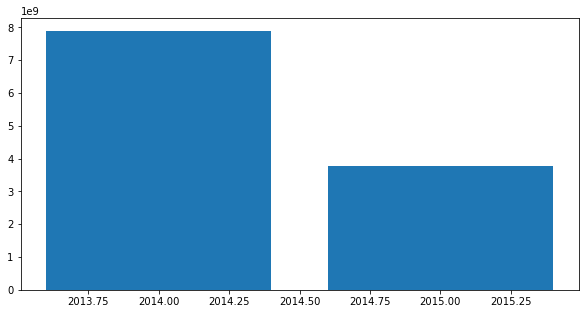

In [279]:
plt.figure(figsize = (10,5))
aux4 = df[['year','price']].groupby('year').sum().reset_index()
plt.bar(aux4['year'],aux4['price'] )

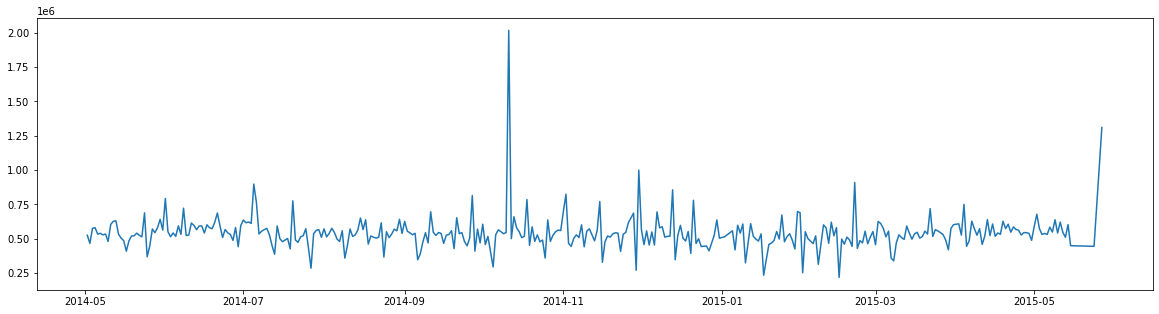

In [280]:
plt.figure(figsize = (20,5))
aux5 = df[['day','price']].groupby('day').mean().reset_index()
plt.plot(aux5['day'],aux5['price'] )

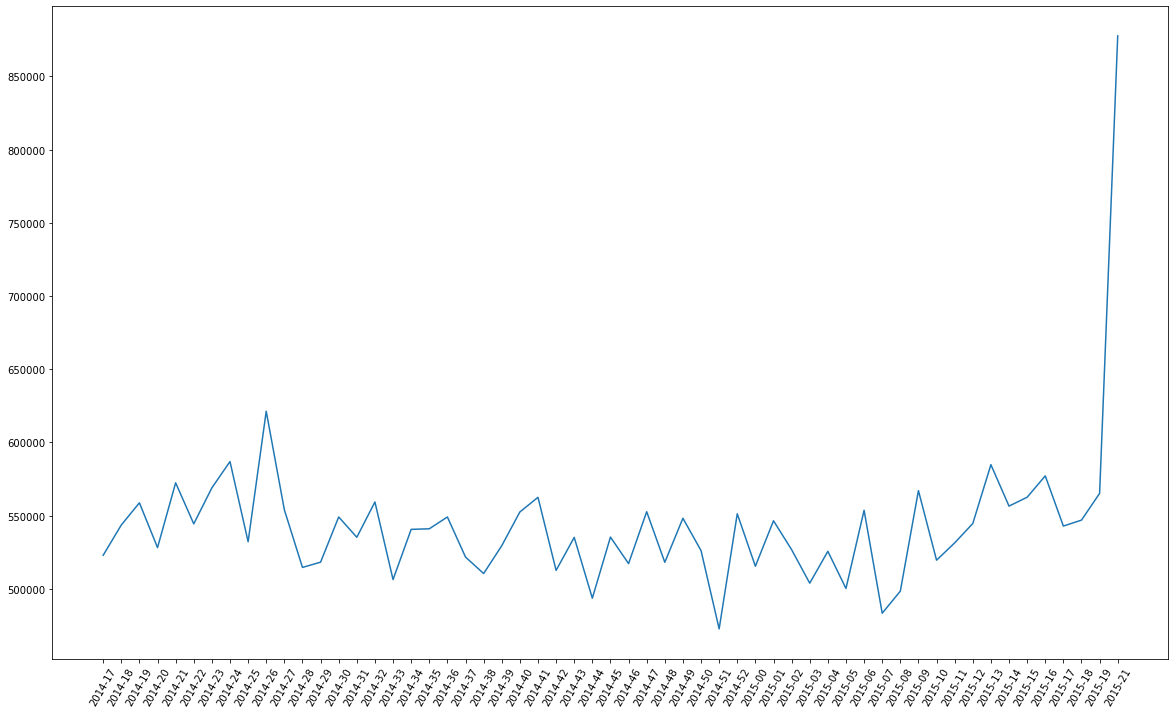

In [289]:
plt.figure(figsize = (20,12))
aux6 = df[['week','price']].groupby('week').mean().reset_index()
plt.plot(aux6['week'],aux6['price'] )
plt.xticks(rotation = 60);

In [ ]:
#Mostrar no mapa pontos de acordo com o preço do imóvel

<BarContainer object of 13 artists>

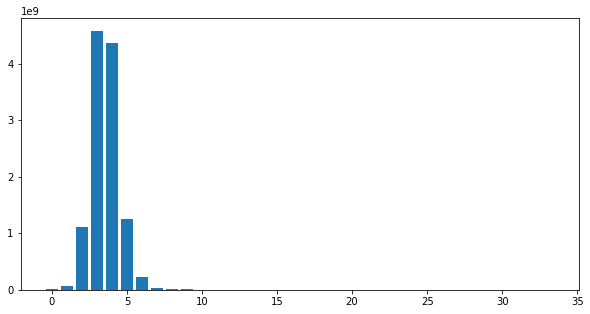

In [303]:
#Fazer grafico de barras que represente a soma dos preços pelo numero de quartos - questao 2
aux7 = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
plt.figure(figsize = (10,5))
plt.bar(aux7['bedrooms'], aux7['price'])

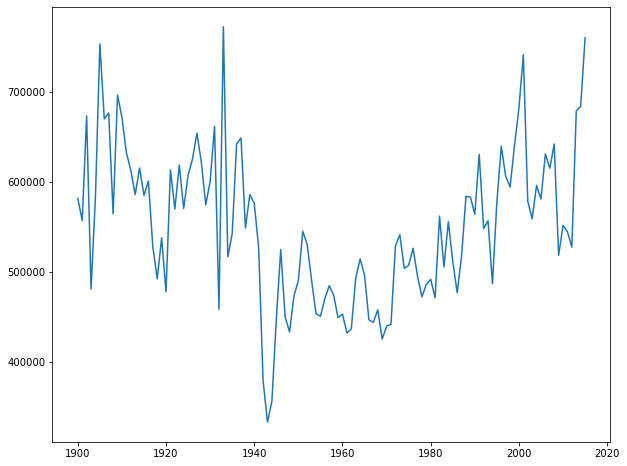

In [309]:
#Fazer grafico de linha que represente a media dos preços pelo ano de construção - questão 3
aux8 = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
plt.figure(figsize = (10,8))
plt.plot(aux8['yr_built'], aux8['price'])

<BarContainer object of 3 artists>

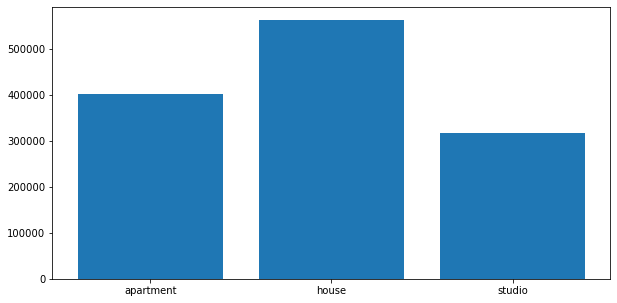

In [327]:
#Fazer grafico de barras que represente a media dos preços pelo tipo de dormitorio - quetão 4
aux9 = df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
plt.figure(figsize = (10,5))
plt.bar(aux9['dormitory_type'], aux9['price'])

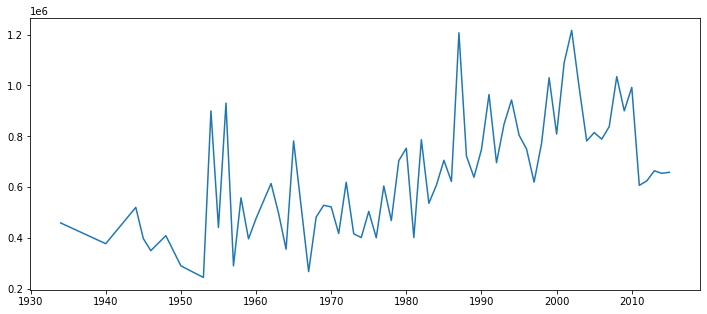

In [328]:
#Fazer grafico de linha que mostre a evolução da media dos preços pelo ano de reforma, a partir de 1930 - questão 5
aux10 = df[df['yr_renovated'] > 1930]
aux10 = aux10[['yr_renovated', 'price']].groupby('yr_renovated').mean().reset_index()
plt.figure(figsize = (12,5))
plt.plot(aux10['yr_renovated'], aux10['price'])

In [329]:
#Fazer tabela que mostre a media dos preços por ano de construção e tipo de dormitorio
df[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean().reset_index()

yr_built dormitory_type          price
0        1900      apartment  589533.333333
1        1900          house  584854.271429
2        1900         studio  398944.000000
3        1901      apartment  452856.400000
4        1901          house  578619.166667
..        ...            ...            ...
300      2014          house  692687.716981
301      2014         studio  516500.000000
302      2015      apartment  543250.000000
303      2015          house  797383.060606
304      2015         studio  385195.000000

[305 rows x 3 columns]

<BarContainer object of 3 artists>

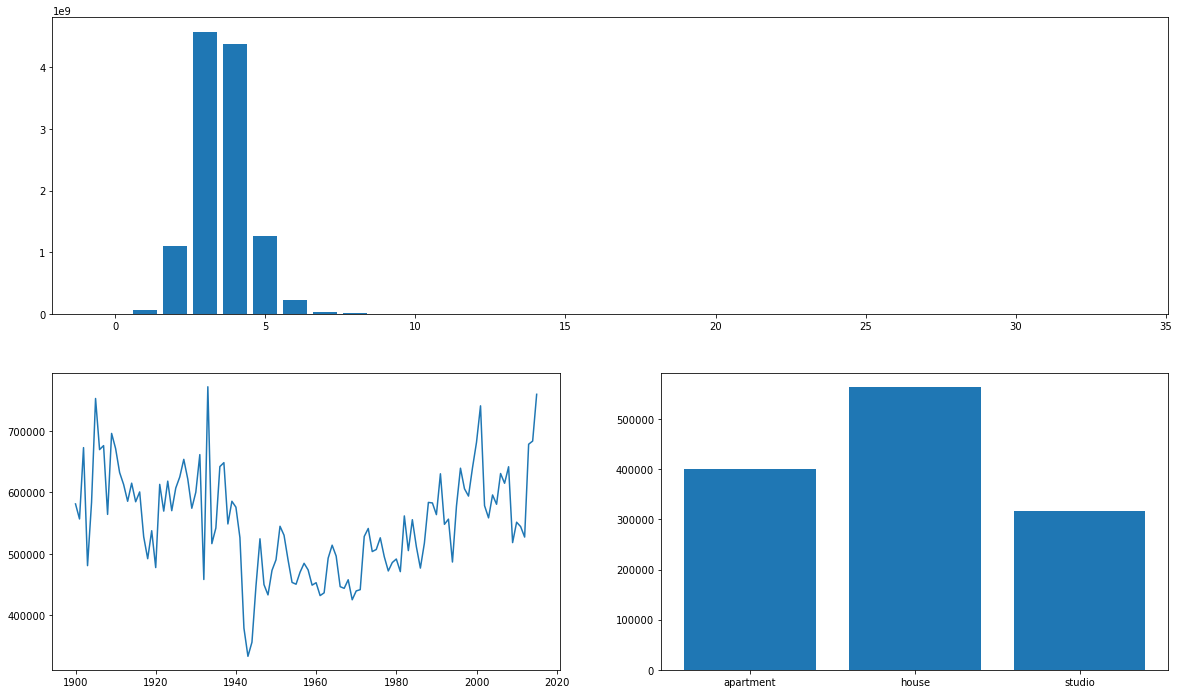

In [344]:
#Crie um dashboard com os graficos 2, 3 e 4(1 linha e 2 colunas)  
fig = plt.figure(figsize = (20,12))
specs = gridspec.GridSpec(ncols = 2, nrows = 2, figure = fig)


au7 = fig.add_subplot(specs[0,:])
au8 = fig.add_subplot(specs[1,0])
au9 = fig.add_subplot(specs[1,1])


au7.bar(aux7['bedrooms'], aux7['price'])

au8.plot(aux8['yr_built'], aux8['price'])

au9.bar(aux9['dormitory_type'], aux9['price'])


<BarContainer object of 3 artists>

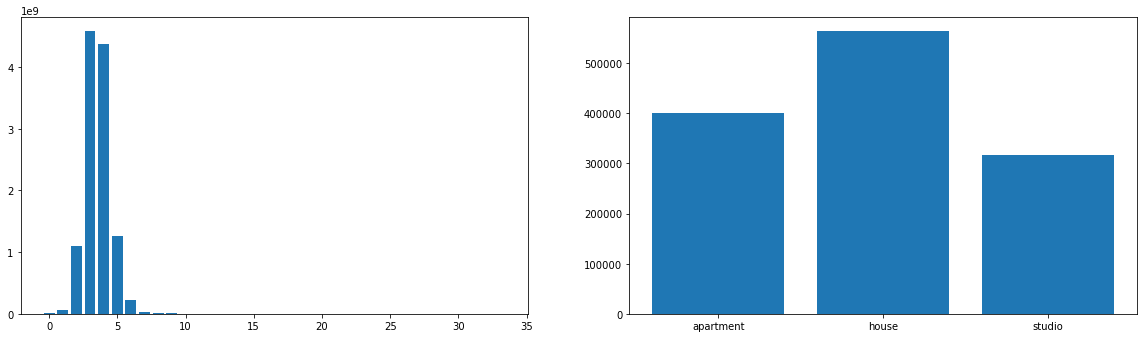

In [346]:
#Crie um dashboard com os graficos 2 e 4(2 colunas)  
fig = plt.figure(figsize = (20,12))
specs = gridspec.GridSpec(ncols = 2, nrows = 2, figure = fig)


au7 = fig.add_subplot(specs[0,0])
au9 = fig.add_subplot(specs[0,1])


au7.bar(aux7['bedrooms'], aux7['price'])

au9.bar(aux9['dormitory_type'], aux9['price'])


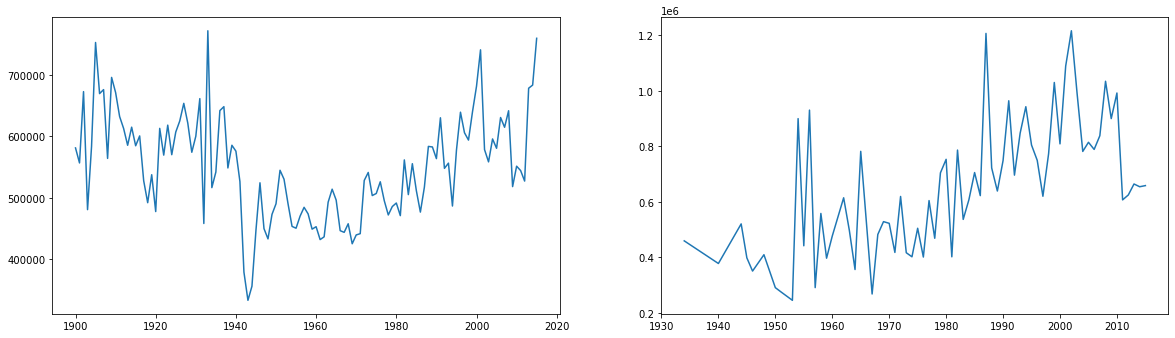

In [348]:
#Crie um dashboard com os graficos 3 e 5(2 colunas)  
fig = plt.figure(figsize = (20,12))
specs = gridspec.GridSpec(ncols = 2, nrows = 2, figure = fig)


au7 = fig.add_subplot(specs[0,0])
au8 = fig.add_subplot(specs[0,1])


au7.plot(aux8['yr_built'], aux8['price'])

au8.plot(aux10['yr_renovated'], aux10['price'])


In [395]:
#Faça um gráfico com o tamanho dos pontos sendo iguais ao tamanho da sala de estar. 
df[['sqft_living', 'id']].groupby('sqft_living').count().reset_index()

sqft_living  id
0             290   1
1             370   1
2             380   1
3             384   1
4             390   2
...           ...  ..
1033         9640   1
1034         9890   1
1035        10040   1
1036        12050   1
1037        13540   1

[1038 rows x 2 columns]

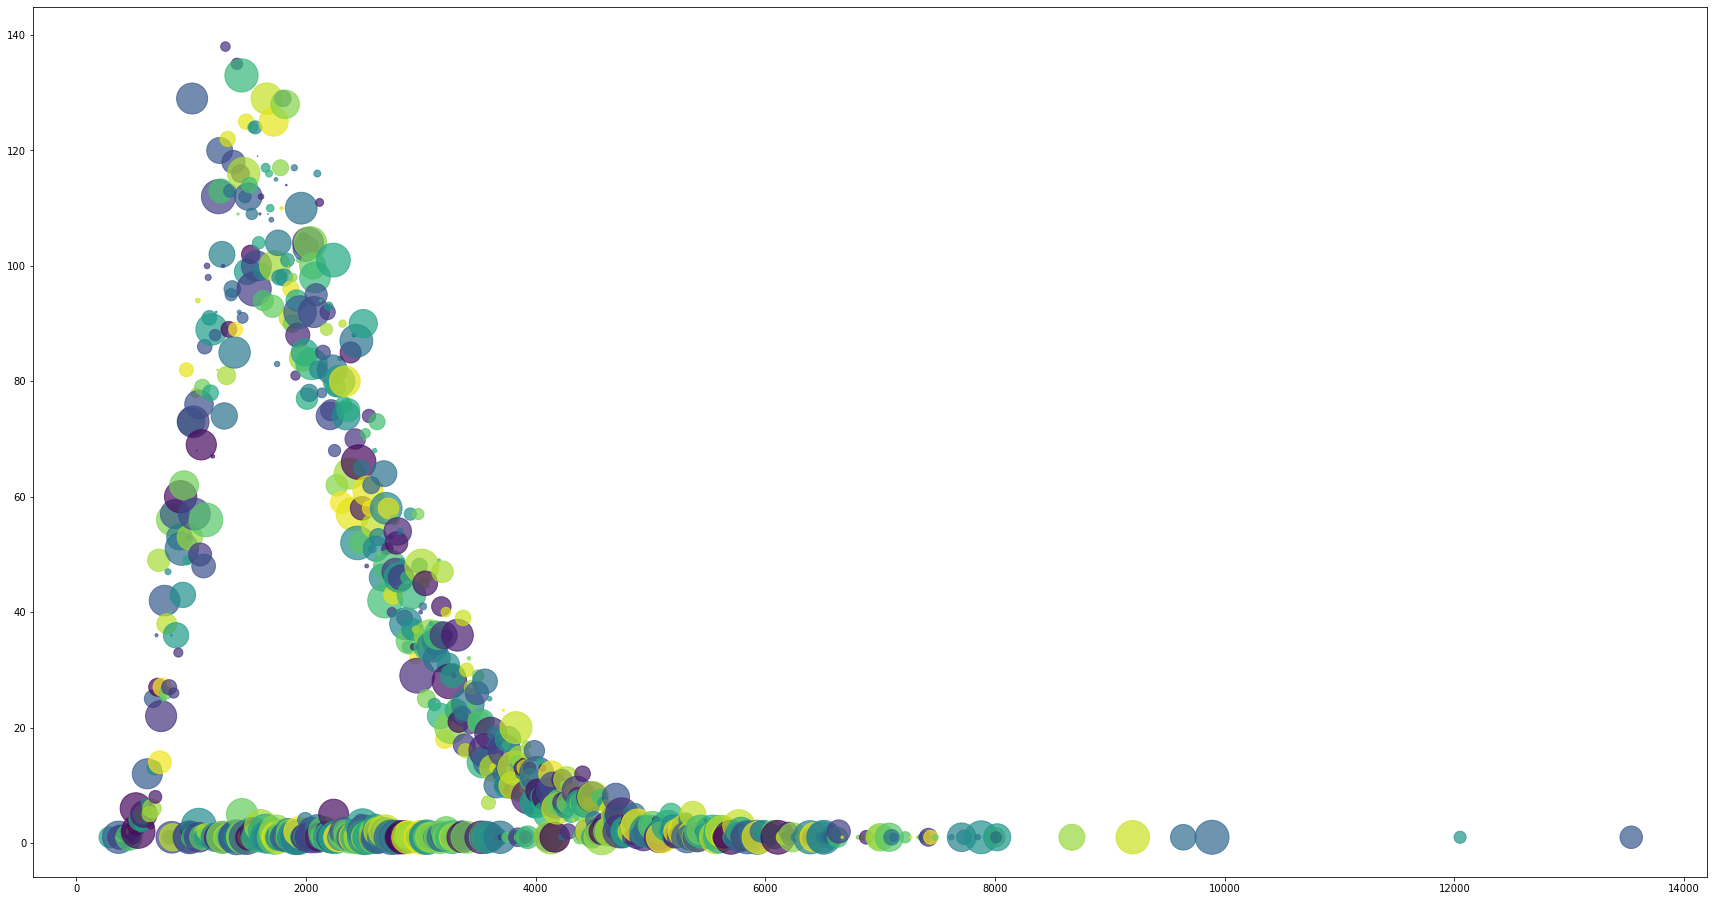

In [411]:
aux11 = df[['sqft_living', 'id']].groupby('sqft_living').count().reset_index()

N = 1038
x = aux11['sqft_living']
y = aux11['id']
colors = np.random.rand(N)
area = (35 * np.random.rand(N))**2

plt.figure(figsize = (30,16))
plt.scatter(x, y, alpha= 0.7, s= area, c= colors )
plt.show()

In [406]:
# Qual a quantidade de imoveis por nivel
#Nivel 0 :Preço entre R$0.00 e R$321.950
#Nivel 1 :Preço entre R$321.950,00 e R$450.000
#Nivel 2 :Preço entre R$450.000 e R$645.000
#Nivel 3 :Preço acima de R$645.000

for i in range(len( df ) ):
    if (df.loc[i, 'price'] >= 0) & (df.loc[i, 'price'] < 321950):
        df.loc[i, 'nivel'] = 'nivel_0'
    
    elif (df.loc[i, 'price'] >= 321950) & (df.loc[i, 'price'] < 450000):
        df.loc[i, 'nivel'] = 'nivel_1'
        
    elif (df.loc[i, 'price'] >=450000 ) & (df.loc[i, 'price'] < 645000):
        df.loc[i, 'nivel'] = 'nivel_2'
        
    else:
        df.loc[i, 'nivel'] = 'nivel_3'
        

In [445]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...      lat     long  sqft_living15  \
0      5650     1.0           0     0  ...  47.5112 -122.257           1340   
1      7242     2.0           0     0  ...  47.7210 -122.319           1690   
2     10000     1.0           0     0  ...  47.7379 -122.233           2720   
3      5000     1.0           0     0  ...  47.5208 -122.393           1360   
4      8080     1.0           0     0  ...  47.6168 -122.045           1800   

   sqft_lot15    nivel                      road  house_number  neighbourhood  \
0        5650  nivel_0         61st Avenue South         10012  Rainier Beach   
1        7639  nivel_2    Northeast 127th Street           837             NA   
2        8062  nivel_0     81st Avenue Northeast         15109             NA   
3        5000  nivel_2  Fauntleroy Way Southwest          9236     Fauntleroy   
4        7503  nivel_2    221st Avenue Northeast           907             NA   

      city       state  
0  Seattle  Washington  
1  Seattle  Washington  
2       NA  Washington  
3  Seattle  Washington  
4       NA  Washington  

[5 rows x 27 columns]

In [ ]:
#Adicionar as informações :
#Nome da rua
#Número do imovel
#Nome do bairro
#Nome da cidade 
#Nome do estado

In [424]:
!pip install geopy

In [425]:
from geopy import Nominatim

In [446]:
df['road'] = 'NA'
df['house_number'] = 'NA'
df['neighbourhood'] = 'NA'
df['city'] = 'NA'
df['state'] = 'NA'

In [447]:
geolocator = Nominatim(user_agent = 'address')


for i in range(len(df)):
    
    query = str(df.loc[i,'lat']) + ',' + str(df.loc[i,'long'])
    location = geolocator.reverse(query)

    if 'road' in location.raw['address']:
        df.loc[i,'road']          = location.raw['address']['road']

        
    if 'house_number' in location.raw['address']:
        df.loc[i,'house_number']  = location.raw['address']['house_number']
    
    
    if 'neighbourhood' in location.raw['address']:
        df.loc[i,'neighbourhood'] = location.raw['address']['neighbourhood']
    
    
    if 'city' in location.raw['address']:
        df.loc[i,'city']          = location.raw['address']['city']
    
    
    if 'state' in location.raw['address']:
        df.loc[i,'state']         = location.raw['address']['state']

df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...      lat     long  sqft_living15  \
0      5650     1.0           0     0  ...  47.5112 -122.257           1340   
1      7242     2.0           0     0  ...  47.7210 -122.319           1690   
2     10000     1.0           0     0  ...  47.7379 -122.233           2720   
3      5000     1.0           0     0  ...  47.5208 -122.393           1360   
4      8080     1.0           0     0  ...  47.6168 -122.045           1800   

   sqft_lot15    nivel                      road  house_number  neighbourhood  \
0        5650  nivel_0         61st Avenue South         10012  Rainier Beach   
1        7639  nivel_2    Northeast 127th Street           837             NA   
2        8062  nivel_0     81st Avenue Northeast         15109             NA   
3        5000  nivel_2  Fauntleroy Way Southwest          9236     Fauntleroy   
4        7503  nivel_2    221st Avenue Northeast           907             NA   

      city       state  
0  Seattle  Washington  
1  Seattle  Washington  
2       NA  Washington  
3  Seattle  Washington  
4       NA  Washington  

[5 rows x 27 columns]

In [472]:
df[df[['house_number', 'neighbourhood', 'city', 'state']] == 'NA'].value_counts(normalize = True)

Series([], dtype: float64)

In [462]:
df.shape

(21613, 27)